In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from google.colab import drive

In [ ]:
drive.mount('/content/drive')
path = '/content/drive/MyDrive/Datasets/Superstore Sales Dataset.csv'
df = pd.read_csv(path)
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,CA-2017-138688,12/6/2017,16/06/2017,Second Class,DV-13045,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


# **Data cleaning**

In [ ]:
df.isna().sum()

,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Segment,0
Country,0
City,0
State,0
Postal Code,11


In [ ]:
# Not Important columns for analysis.
cols_to_drop = ['Row ID', 'Order ID', 'Customer ID', 'Postal Code']
df = df.drop(columns=[col for col in cols_to_drop if col in df.columns])
df.columns

Index(['Order Date', 'Ship Date', 'Ship Mode', 'Segment', 'Country', 'City',
       'State', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

# **Overall Sales Trend**

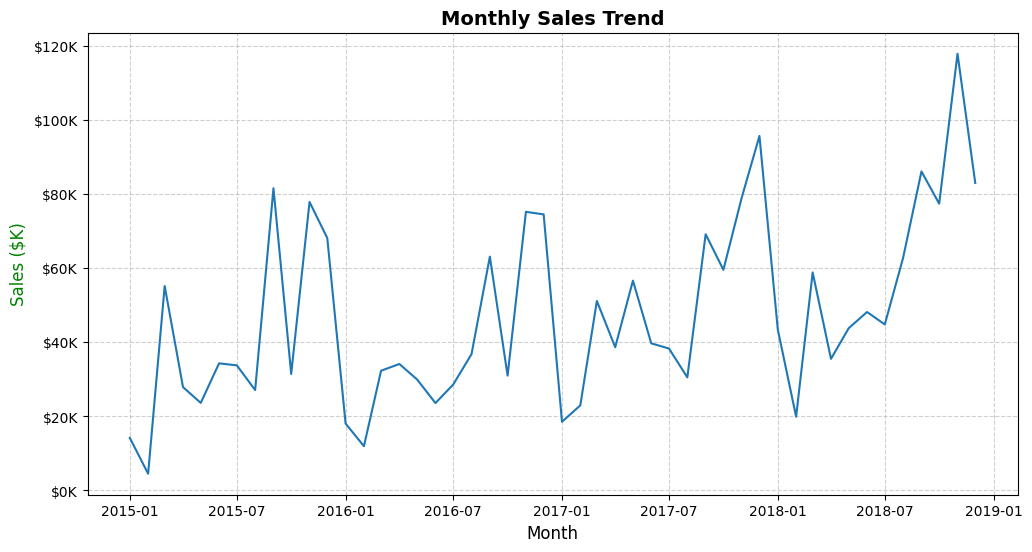

In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'],dayfirst = True)
sales_trend = df.groupby(df['Order Date'].dt.to_period("M"))['Sales'].sum().reset_index()
sales_trend['Order Date'] = sales_trend['Order Date'].dt.to_timestamp()
plt.figure(figsize=(12,6))
plt.plot(sales_trend['Order Date'],sales_trend['Sales'])
plt.title('Monthly Sales Trend',fontsize=14,fontweight = 'bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel("Sales ($K)", fontsize=12,c = 'g')
ax = plt.gca()
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'${x/1000:,.0f}K'))
plt.grid(True,linestyle='--', alpha = 0.6)
plt.show()

# **Regional & Market Performance**

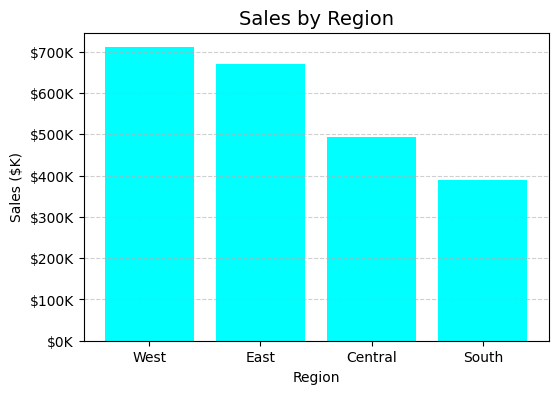

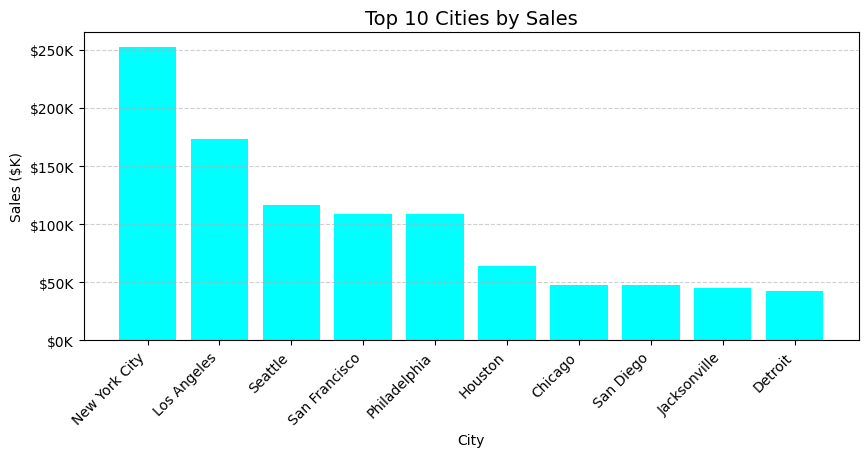

In [ ]:

region_sales = (
    df.groupby('Region')['Sales']
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)
city_sales = (
    df.groupby('City')['Sales']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)
region_sales['Sales (K$)'] = region_sales['Sales'].apply(lambda x: f"${x/1000:.1f}K")
city_sales['Sales (K$)'] = city_sales['Sales'].apply(lambda x: f"${x/1000:.1f}K")

plt.figure(figsize=(6,4))
plt.bar(region_sales['Region'], region_sales['Sales'], color='cyan')
plt.title('Sales by Region', fontsize=14)
plt.xlabel('Region')
plt.ylabel('Sales ($K)')
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'${x/1000:.0f}K'))
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

plt.figure(figsize=(10,4))
plt.bar(city_sales['City'], city_sales['Sales'], color='cyan')
plt.title('Top 10 Cities by Sales', fontsize=14)
plt.xlabel('City')
plt.ylabel('Sales ($K)')
plt.xticks(rotation=45, ha='right')
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'${x/1000:.0f}K'))
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()




# **Customer Segment Analysis**

In [ ]:
segment_summary = df.groupby('Segment')['Sales'].agg(['sum', 'mean', 'count'])
segment_summary.sort_values('sum', ascending=False)


,sum,mean,count
Segment,,,
Consumer,1.148061e+06,225.065777,5101
Corporate,6.884941e+05,233.150720,2953
Home Office,4.249822e+05,243.403309,1746


/tmp/ipython-input-4105765420.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Category', y='Sales', data=df, estimator=sum, ci=None)
/tmp/ipython-input-4105765420.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Sub-Category', y='Sales', data=df, estimator=sum, ci=None)


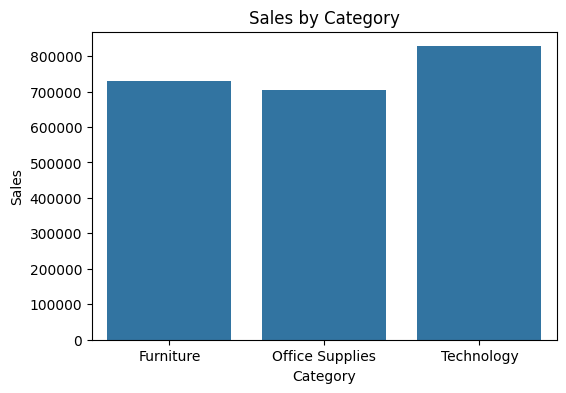

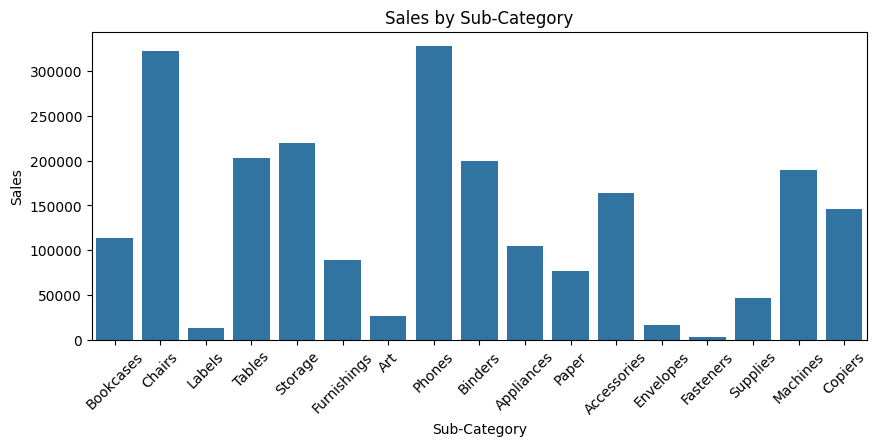

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(x='Category', y='Sales', data=df, estimator=sum, ci=None)
plt.title('Sales by Category')

plt.figure(figsize=(10,4))
sns.barplot(x='Sub-Category', y='Sales', data=df, estimator=sum, ci=None)
plt.title('Sales by Sub-Category')
plt.xticks(rotation=45)
plt.show()


# **Seasonality**

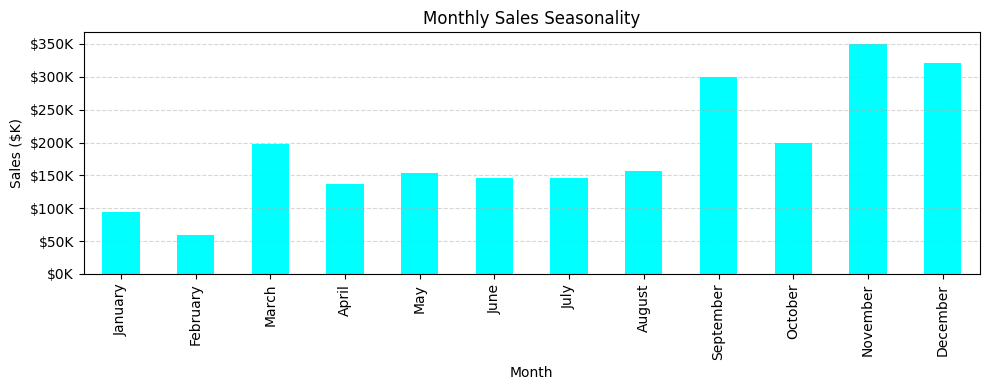

In [ ]:
df['Month'] = df['Order Date'].dt.month_name()

monthly_sales = df.groupby('Month')['Sales'].sum()
monthly_sales = monthly_sales.reindex([
    'January','February','March','April','May','June',
    'July','August','September','October','November','December'
])

monthly_sales = monthly_sales / 1000

plt.figure(figsize=(10,4))
monthly_sales.plot(kind='bar', color='cyan', title='Monthly Sales Seasonality')

plt.xlabel('Month')
plt.ylabel('Sales ($K)')
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'${x:.0f}K'))
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
# it seems that the sales increase gradualy throughout the year except october.